In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

Loading raw data

In [199]:
raw_data = pd.read_csv('sample_data/1.04.+Real-life+example.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


# **Preprocessing**

**Exploring the descriptive statistics of the variables**

In [200]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


**Determing the variable of interest**

In [201]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


太多不同的 Model 要去掉，是因为维度太高、数据太稀疏，容易过拟合。样本太少：有些车型可能只出现 1、2 次，模型学不到规律，反而会引入噪声。

drop(['Model'],axis=1)

drop 'Model'

axis: 0 or 'index' for rows, 1 or 'columns' for columns. Default is 0.

**Dealing with missing values**

In [202]:
data.isnull().sum()
# isnull()是检查缺失值。True → 表示该位置是缺失值 (NaN / None)。False → 表示该位置不是缺失值。、
# .isnull().sum()是检查整个表有多少缺失值。

,0
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine Type,0
Registration,0
Year,0


In [203]:
data_no_mv = data.dropna(axis=0)
# Drop rows with any missing values(NaN / None)

In [204]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# **Exploring the PDFs**

/tmp/ipython-input-216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

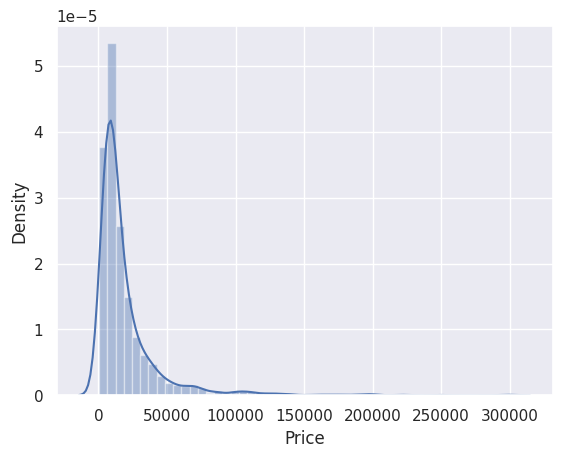

In [205]:
sns.distplot(data_no_mv['Price'])

# **Dealing with outliers**

In [206]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


quantile(0.99) 表示找到 99%分位数（也就是比 99% 的数据都大的那个值）。

假设 99% 分位数是 50,000，意味着 99% 的车价格 ≤ 50,000，只有 1% 的车价格高于 50,000。


data_no_mv[data_no_mv['Price'] < q]
保留价格小于 99%分位数的样本。也就是把最贵的 1% 车辆当作 异常值（outlier）删除。

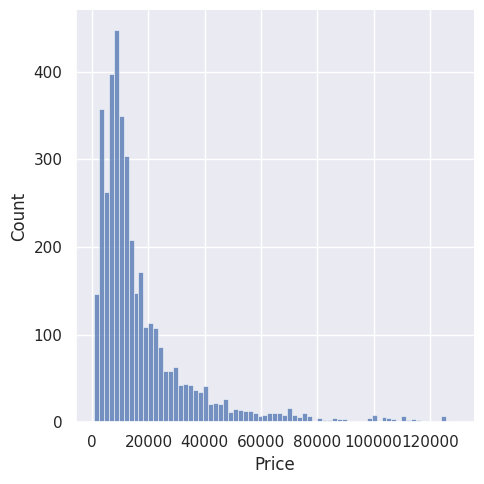

In [207]:
sns.displot(data_1['Price'])

/tmp/ipython-input-534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

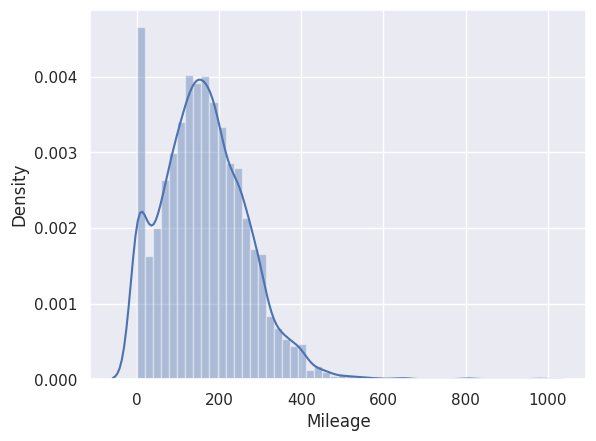

In [208]:
sns.distplot(data_no_mv['Mileage'])

In [209]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/tmp/ipython-input-1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

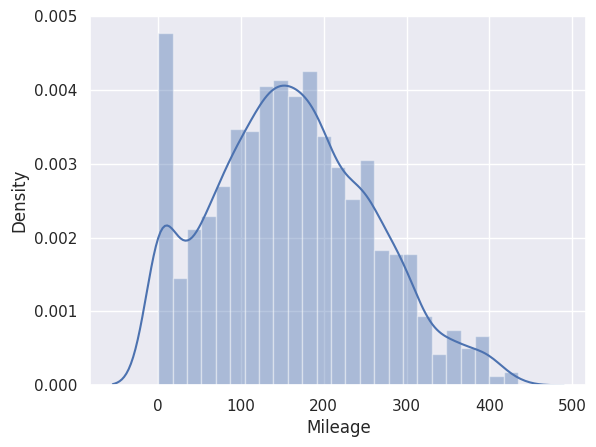

In [210]:
sns.distplot(data_2['Mileage'])

/tmp/ipython-input-823394628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

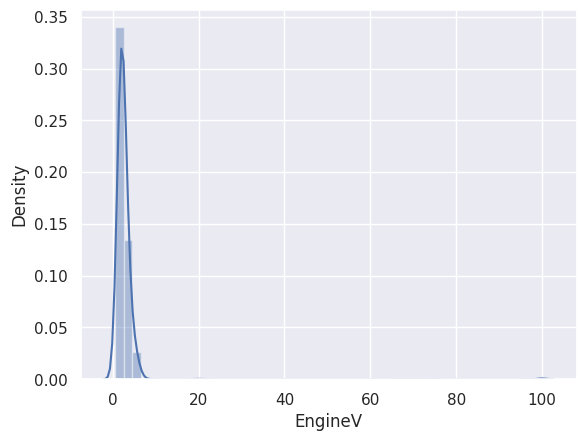

In [211]:
sns.distplot(data_no_mv['EngineV'])

In [212]:
data_3 = data_2[data_2['EngineV'] < 6.5]

Engineer volumn通常在0.6-6.5之间

/tmp/ipython-input-1902427236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

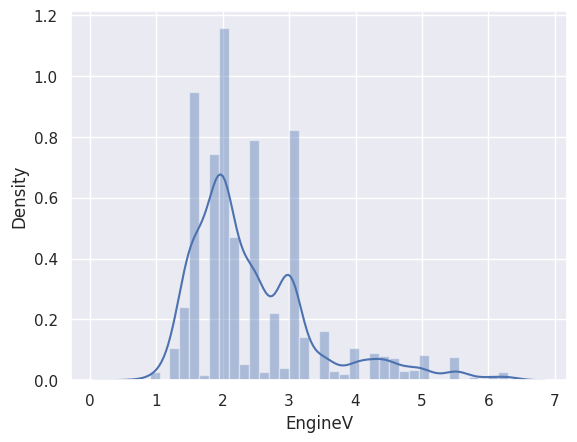

In [213]:
sns.distplot(data_3['EngineV'])

/tmp/ipython-input-534082538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Year'])


<Axes: xlabel='Year', ylabel='Density'>

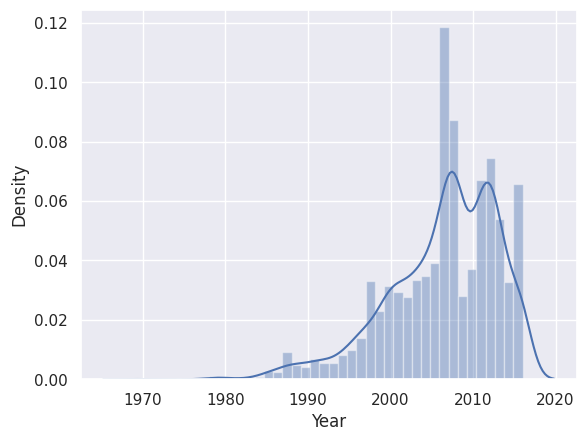

In [214]:
sns.distplot(data_no_mv['Year'])

In [215]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]

/tmp/ipython-input-2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

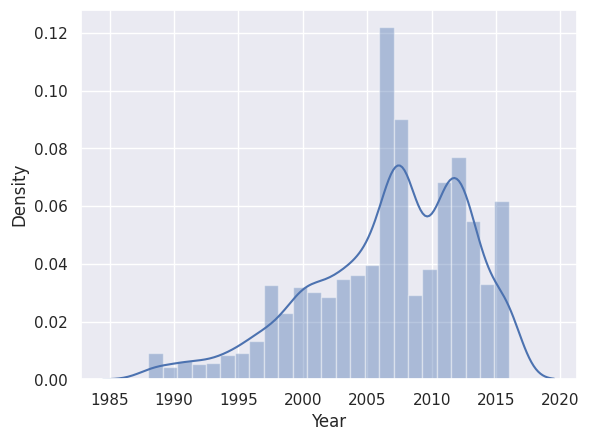

In [216]:
sns.distplot(data_4['Year'])

In [217]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


默认情况下，pandas 在你做数据清洗（比如删掉行）之后，索引（index）不会自动更新。

比如，原本有行号 [0,1,2,3,4]，如果你删掉了第 2 行，索引会变成 [0,1,3,4]，出现“跳号”。

# **Checking the OLS assumptions**

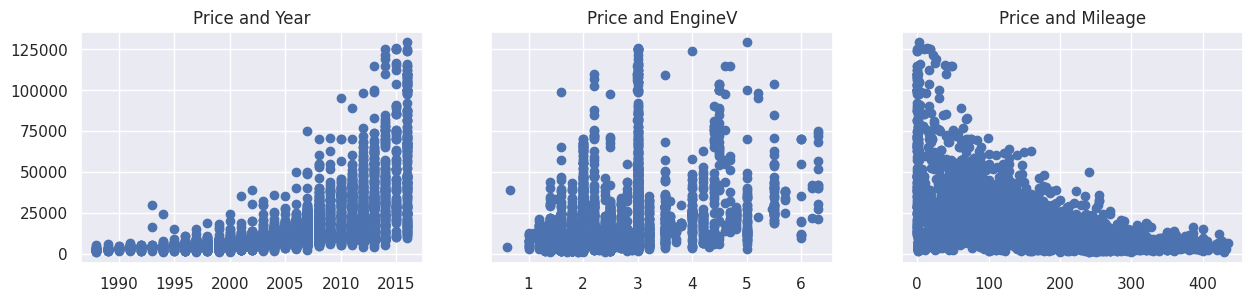

In [218]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

plt.subplots(1, 3, ...)：创建一行三列的子图（3 个画布 ax）。

sharey=True：三个图共用一个 y 轴（这里是 Price），方便比较。

figsize=(15, 3)：设置画布大小（15 宽，3 高）。

f 是整个 figure，ax1, ax2, ax3 是三个子图。

scatter() = Create the scatter plot(创建散点图)

/tmp/ipython-input-462586877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

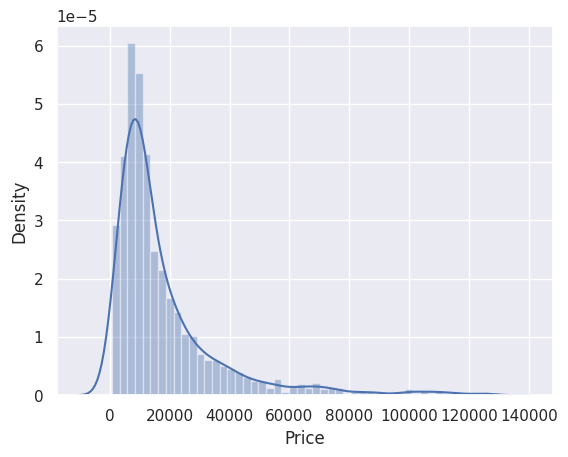

In [219]:
sns.distplot(data_cleaned['Price'])

# **Relaxing the assumptions**



In [220]:
log_price = np.log(data_cleaned['Price'])

有些豪车价格非常高，导致数据分布严重偏斜。

取对数后，高价格被压缩，低价格差异被拉大 → 分布更接近正态分布。

假设原始价格数据是：
1000
5000
30000
100000

取对数后变成：
6.9
8.5
10.3
11.5

In [221]:
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


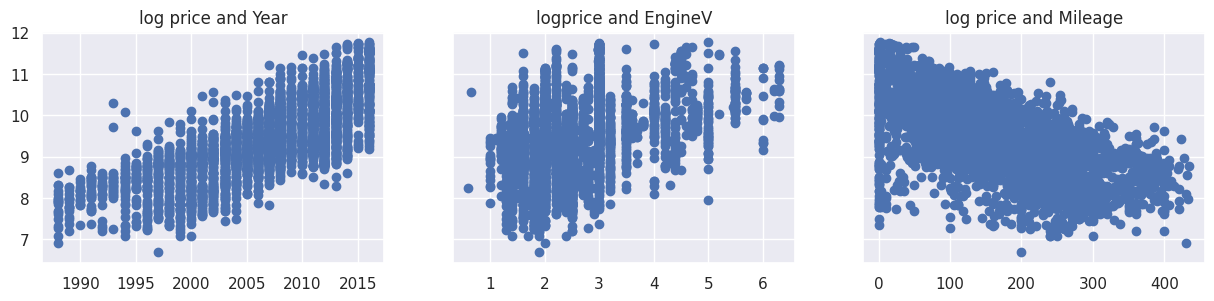

In [222]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('logprice and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log price and Mileage')

plt.show()

In [223]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)
# 去掉price，log_price可以代替price

In [224]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


# **Multicollinearity**

In [225]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [226]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
# 从清理过的数据里，选取 Mileage、Year、EngineV 这三个特征。

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
#用 variance_inflation_factor 计算每个变量的 VIF 值。
# variables.values = 转换成 numpy 数组
# i = 当前变量的列索引
# variance_inflation_factor 会用公式计算

In [227]:
variables

,Mileage,Year,EngineV
0,277,1991,2.0
1,427,1999,2.9
2,358,2003,5.0
3,240,2007,4.2
4,120,2011,2.0
...,...,...,...
3862,163,2008,2.5
3863,35,2014,1.6
3864,9,2014,3.0
3865,1,1999,3.5


In [228]:
variables.values

array([[2.770e+02, 1.991e+03, 2.000e+00],
       [4.270e+02, 1.999e+03, 2.900e+00],
       [3.580e+02, 2.003e+03, 5.000e+00],
       ...,
       [9.000e+00, 2.014e+03, 3.000e+00],
       [1.000e+00, 1.999e+03, 3.500e+00],
       [1.240e+02, 2.013e+03, 2.000e+00]])

In [229]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


VIF 就是一个数值化的检测方法。

VIF = 1 → 完全没有共线性

1 < VIF < 5 → 轻度相关，可以接受

5 < VIF < 10 → 较强相关，需要注意

VIF > 10 → 严重多重共线性，应该考虑剔除或调整变量

**VIF（Variance Inflation Factor，方差膨胀因子）**

在回归模型里，如果两个或多个自变量（特征）高度相关，会导致：

回归系数不稳定（小小改动数据，系数就大变）

系数的标准误差变大（估计不准确）

难以判断哪个变量真正起作用

**example：**

特征有：房子面积 (Area)，卧室数量 (Bedrooms)，客厅数量 (Living Rooms)。

Area 和 Bedrooms 高度相关（房子越大，卧室越多）。

Features	VIF
Area	15.2
Bedrooms	12.7
LivingRm	2.3

说明 Area 和 Bedrooms 严重共线性，最好只保留一个。

In [230]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)
# 删掉年份，因为年份与其他变量的相关性太强了

In [231]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


# **Create dummy variable**

虚拟数据：1 or 0

In [232]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True, dtype=int)

In [233]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [234]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [235]:
cols = ['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
# 创建一个cols = []，include所有要展示的data feature

In [236]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed
# 创建data_preprocessed，data_with_dummies[cols]展示cols里包含的data feature

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# **Linear regression model**

**Declear the input and the targets**

In [237]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)
# targets是只有log_price的数据，inputs是除了log_price之外的其它数据

**Scale the data**

In [238]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [239]:
inputs_scaled = scaler.transform(inputs)

inputs_scaled里面的数据，只有Mileage 和 EngineV 的数据会标准化，变成均值 0、方差 1 的分布。其它data feature的数据基本不会变。

In [240]:
inputs_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

# **TrainTest Split**

# **Trainning**

In [241]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)
# x = inputs_scaled, y = targets train80% test20%

***Create the regression***

In [242]:
reg = LinearRegression()
reg.fit(x_train,y_train)
# linearRegression fit()会得到 ex: R-Squared, const coef .........

LinearRegression()

**fit(x_train, y_train) 的作用是：**

训练模型

找到最佳的参数（系数 coef_ 和 截距intercept_）

这些参数是让预测值y_hat尽量接近真实值y的结果

**用fit()学到后会储存在reg里面**

再用reg.predict(x_train) 会使用 fit 学到的参数，把 x_train 输入公式

得到预测值（这里就是 y_hat）。

**如果没有先 fit()，模型根本没有参数，predict() 就不知道怎么算。**

In [243]:
y_hat = reg.predict(x_train)

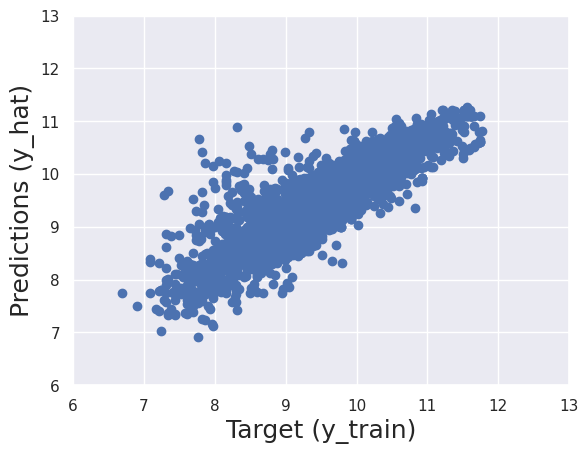

In [244]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

y_train=target(原始的log_price), y_hat是通过predict()里面的公式计算出预测的price。

log(Price)=β0​+β1​⋅Mileage+β2​⋅EngineV+β3​⋅Brand_BMW+β4​⋅Body_sedan+...........

当y_train的数据(log_price)等于多少的时候，predict()算出来的price会是多少。

也就是根据现在的情况所有的价格预测之后的价格

Text(0.5, 1.0, 'Residuals PDF')

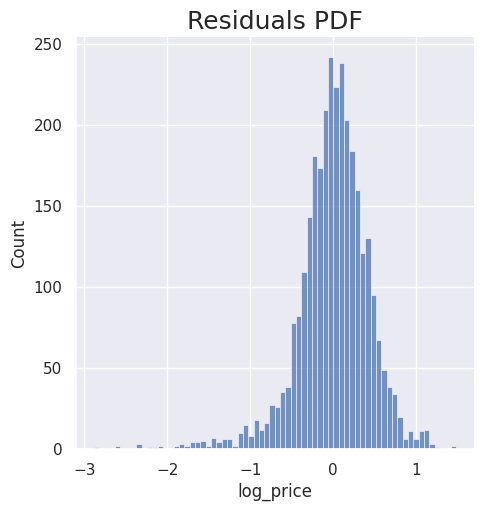

In [245]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

y_train=真实数据，y_hat=预测数据

y_train - y_hat=残差数据

**大部分算出来的残差数据处于0附近，这说明预测的还是挺准确的。**

In [246]:
reg.score(x_train,y_train)
# R-squared

0.744996578792662

大概74%的inputs_scaled会是影响targets(log-price)的因素

# **Finding the weight and bias**

In [247]:
reg.intercept_
# x_train coef

np.float64(9.415239458021299)

In [248]:
reg.coef_
# const coef

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [249]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary
# inputs是除了log_price之外的其它data feature，设成'Features'的value。
# data feature 'Weights'的value = reg.coef_

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


有些权重是正的, 有些权重是负的｡

例如引擎体积(EngineV)｡ 发动机体积越大, 价格越高｡

或者, 负权重表示随着要素值的增加, 汽车的价格会降低｡

一个突出的例子是里程｡ 一辆车开得越多(Mileage), 价格就越低｡

In [250]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

Features里面没有Audi，因为虚拟变量陷阱（Dummy Variable Trap），Audi是为0。Audi是标杆所有为0。

其它品牌会以Audi为标杆：

大于0就是比Audi贵

小于0就是比Audi便宜

**比如：**

Brand_BMW = 0.01425，就表示在其它条件相同的情况下，BMW 相比 Audi，log-price 会增加 0.01425。

如果都为 0，就是 Audi。

# **Testing**

In [251]:
y_hat_test = reg.predict(x_test)

x_train,y_train(抽出来的80%data)通过fit()训练出参数R-squared, const coef.....,储存在reg。

**reg.predict(x_test)** 是用x_test(真实值)做测试, 预测出y_hat_test(预测值)

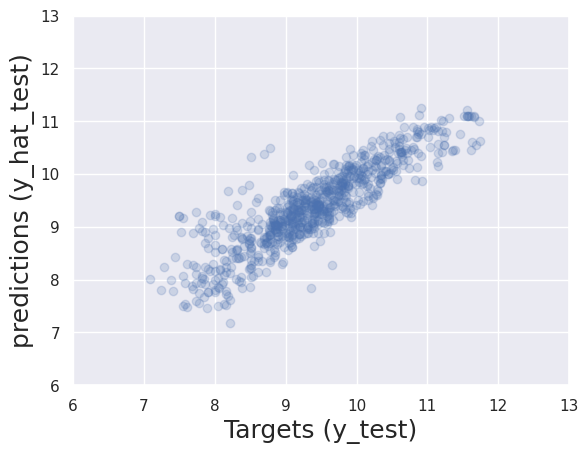

In [252]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
# y_test=真实值
# y_hat_test=预测值
# alpha=点的显示度

# 已经计算好的真实值[] 预测值[]是同样的index，然后通过plt.scatter()画出一个散点图

**图中有很多散点，说明预测的价格并不理想，特别是价格便宜的车**

In [253]:
# df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
# df_pf

In [254]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075
...,...
769,29651.726363
770,10732.071179
771,13922.446953
772,27487.751303


In [255]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


用 **np.exp(y_test)** 因为之前用np.log()来压缩数据，所以现在要用 np.exp() 还原，就回到原始的价格。

用 np.log() 变换后，差距缩小，更适合做回归。

训练完成后，用 np.exp() 把预测值变回真实的价格。

In [256]:
y_test = y_test.reset_index(drop=True)
y_test

,log_price
0,7.740664
1,7.937375
2,7.824046
3,8.764053
4,9.121509
...,...
769,10.292146
770,9.169518
771,9.814656
772,11.134589


In [257]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [258]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [260]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [261]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [262]:
df_pf.sort_values(by=['Difference%'])
# sort_values(by=['Difference%'])让data feature是'Difference%'的所有value从小到大排序，这样是让预测和真实的相差率从小到大排序

,Prediction,Target,Residual,Difference%
698,30480.847838,30500.0,19.152162,0.062794
742,16960.310476,16999.0,38.689524,0.227599
60,12469.207487,12500.0,30.792513,0.246340
110,25614.137960,25500.0,-114.137960,0.447600
367,42703.676996,42500.0,-203.676996,0.479240
...,...,...,...,...
657,32481.045510,6000.0,-26481.045510,441.350758
162,9954.416247,1800.0,-8154.416247,453.023125
451,35956.498331,6500.0,-29456.498331,453.176897
532,10019.903027,1800.0,-8219.903027,456.661279


sort_values(by=['Difference%'])让data feature是'Difference%'的所有value从小到大排序，这样是让预测和真实的相差率从小到大排序

需要注意的是, 这些离群值的所有残差均（Residual）为负值｡

因此, 他们的预测高于目标｡

一种解释可能是, 我们忽略了一个推动二手车价格下降的重要因素｡

这可能是汽车的型号, 我们在分析开始时删除了它, 但也可能是汽车在某种程度上受到了损坏｡

一条我们最初没有的信息｡

所以我们有不同的方法可以让我们的模型更好｡

我们可以使用一组不同的变量｡

我们可以移除更大部分的异常值观测值, 或者使用不同种类的变换｡